In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
cd /content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02

/content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02


In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 4, 1, ..., 3, 1, 0],
       [0, 6, 5, ..., 5, 4, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 3, 0],
       [0, 2, 2, ..., 4, 6, 0]], dtype=uint8)
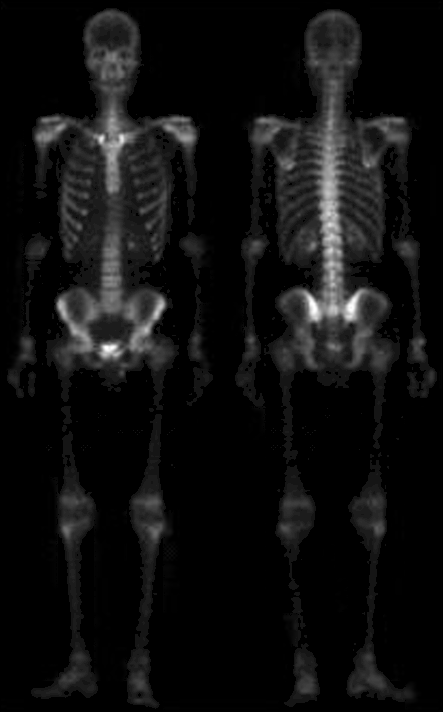

In [119]:
img = cv2.imread('image/skeleton.png', cv2.IMREAD_GRAYSCALE)
img

In [120]:
def show(img):
  plt.imshow(img, cmap='gray')
  plt.show()

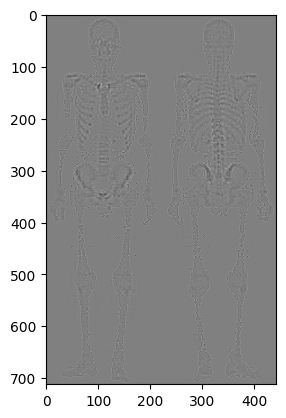

array([[  0.,   8.,   2., ...,   6.,   2.,   0.],
       [  8.,  -9.,   5., ...,  -3.,   3.,   2.],
       [ 12., -13.,  -9., ...,  -7.,  -9.,   8.],
       ...,
       [  0.,   1.,   1., ...,   2.,   3.,   0.],
       [  0.,   2.,   2., ...,   0.,  -4.,   6.],
       [  4.,  -6.,  -5., ...,  -3., -14.,  12.]])

In [121]:
laplacian_filer = cv2.Laplacian(img, cv2.CV_64F)
show(laplacian_filer)
np.clip(laplacian_filer, 0, 255)
laplacian_filer

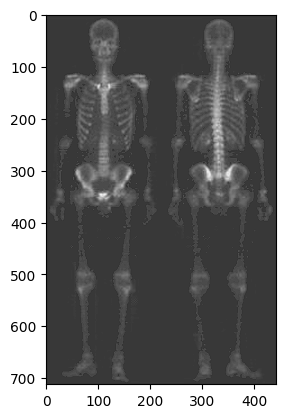

array([[  0.,  -8.,  -2., ...,  -6.,  -2.,   0.],
       [ -8.,  13.,  -4., ...,   6.,  -2.,  -2.],
       [-12.,  19.,  14., ...,  12.,  13.,  -8.],
       ...,
       [  0.,  -1.,  -1., ...,  -2.,  -3.,   0.],
       [  0.,  -2.,  -2., ...,   2.,   7.,  -6.],
       [ -4.,   8.,   7., ...,   7.,  20., -12.]])

In [122]:
sharpened = cv2.subtract(img.astype(np.float64), laplacian_filer)
show(sharpened)
sharpened

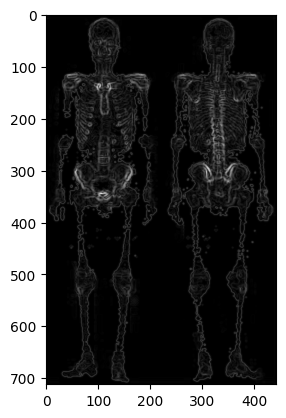

In [123]:
sobel_x = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)
show(sobel)

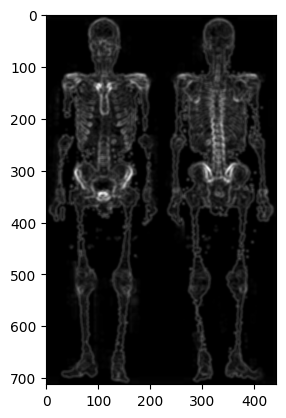

In [124]:
smoothed = cv2.blur(sobel, (5, 5))
show(smoothed)

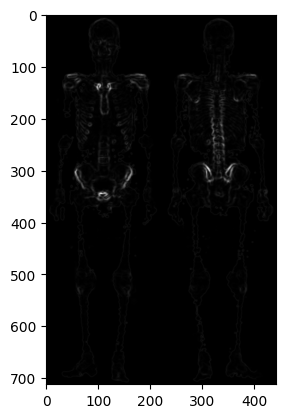

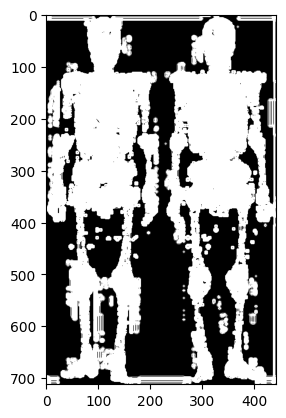

In [132]:
mul = cv2.multiply(sobel, smoothed)
show(mul)

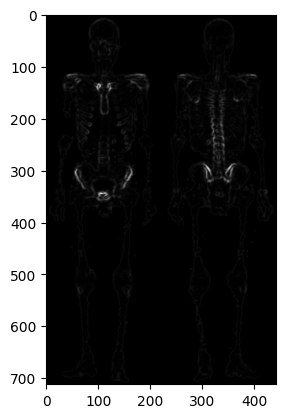

array([[   500.        ,   7447.07467191,  32856.30209368, ...,
         24355.82639493,  47711.68802139,    500.        ],
       [ 81997.4626969 , 104068.66553517, 103696.96907106, ...,
        121865.20525006, 115233.29291659,  61263.59233224],
       [ 21717.59568547,  61679.48868958,  56106.71368604, ...,
         36981.21752384,  68754.27395869,   2207.49979882],
       ...,
       [  1604.07495429,   4337.30321557,   4740.61736329, ...,
         34080.76523769,  34333.82365128,  25636.94845848],
       [ 10808.65479764,  14176.24883885,  15021.27023614, ...,
         78411.03001075,  84934.0402124 ,  63125.72413176],
       [   500.        ,   5438.90302509,   1579.67472085, ...,
         29877.26668338,  56260.26564826,    500.        ]])

In [131]:
af = cv2.add(img.astype(np.float64) + 500, mul)
show(af)
af

In [127]:
def power_law_transformation(image, gamma):
    # Chuyển đổi ảnh về dạng float
    image_float = image.astype(np.float64)
    # Áp dụng công thức power-law
    transformed = np.power(image_float / 255.0, gamma) * 255
    return np.clip(transformed, 0, 255).astype(np.uint8)

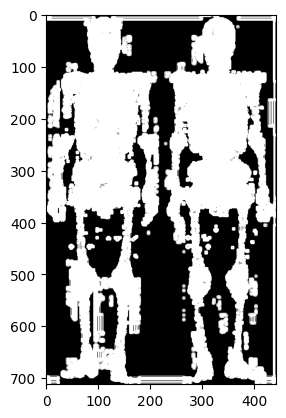

In [128]:
gamma = 0.2  # Bạn có thể thay đổi gamma theo ý muốn
power_law_image = power_law_transformation(af, gamma)
show(power_law_image)